<a href="https://colab.research.google.com/github/katafuchix/at_it_stock_python/blob/main/Ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance

In [ ]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [ ]:
df = get_stock_data(4751).tail(100)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-12,2315.0,2336.0,2294.0,2329.0,3138600
2021-07-13,2338.0,2398.0,2336.0,2345.0,3618500
2021-07-14,2328.0,2338.0,2298.0,2320.0,3197500
2021-07-15,2325.0,2335.0,2267.0,2274.0,2867700
2021-07-16,2252.0,2263.0,2228.0,2241.0,3332100


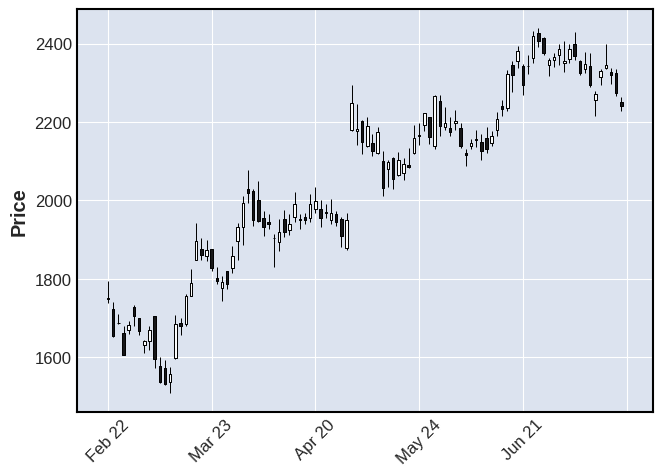

In [ ]:
import mplfinance as mpf

df = get_stock_data(4751).tail(100)
mpf.plot(df, type='candle')

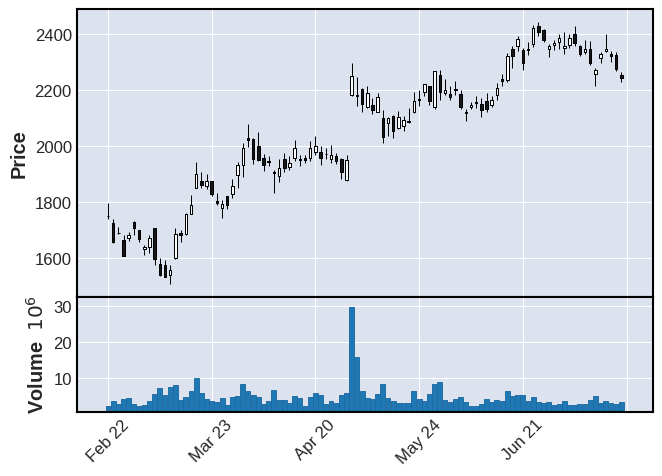

In [ ]:
mpf.plot(df, type='candle', volume=True)

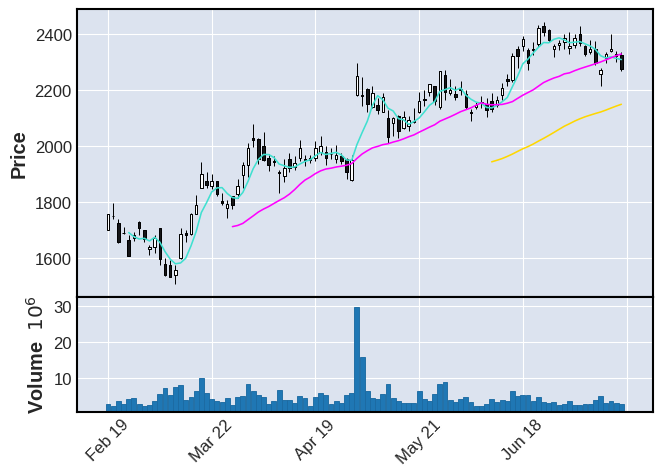

In [ ]:
mpf.plot(df, type='candle', mav=(5, 25, 75), volume=True)

In [ ]:
!pip install pyti

In [ ]:
from pyti.bollinger_bands import upper_bollinger_band as bb_up
from pyti.bollinger_bands import middle_bollinger_band as bb_mid
from pyti.bollinger_bands import lower_bollinger_band as bb_low

data = df['Close'].tolist()  # 終値をリスト型に変換
period = 25
bb_up = bb_up(data, period)    # バンド上限
bb_mid = bb_mid(data, period)  # ミッドバンド
bb_low = bb_low(data, period)  # バンド下限
df['bb_up']  = bb_up
df['bb_mid'] = bb_mid
df['bb_low'] = bb_low

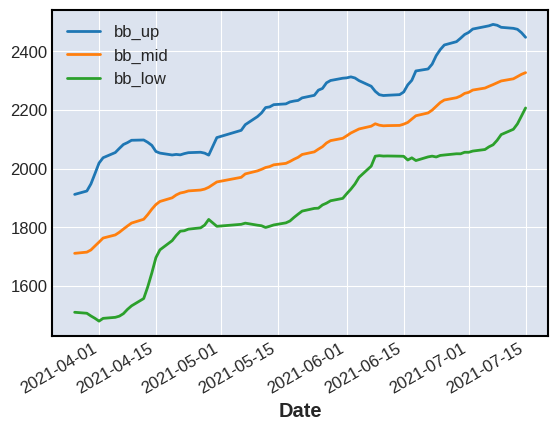

In [ ]:
df[['bb_up', 'bb_mid', 'bb_low']].plot()

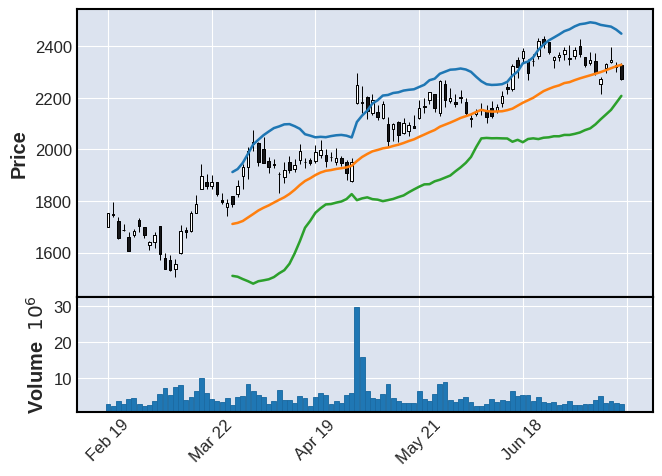

In [ ]:
apd = mpf.make_addplot(df[['bb_up', 'bb_mid', 'bb_low']])
mpf.plot(df, type='candle', addplot=apd, volume=True)